<a href="https://colab.research.google.com/github/KuntumallaJayashree/Consignment-Price/blob/main/Consignment_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
data = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

In [ ]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [ ]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

PQ First Sent to Client Date
PO Sent to Vendor Date      
Scheduled Delivery Date     
Delivered to Client Date    
Delivery Recorded Date      

Above mentioned columns are Dates but their type is object. Need to convert them to date type

In [ ]:
data.shape

(10324, 33)

In [ ]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


## EDA
1. Missing values
2. Explore about numerical variables
3. Explore about categorical variables
4. Find relationship between variables


###  Validating null values/Missing values

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Dosage                          1736
Shipment Mode                    360
Line Item Insurance (USD)        287
Molecule/Test Type                 0
Brand                              0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Vendor                             0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)                 0
Freight Cost (USD)                 0
Item Description                   0
ID                                 0
Project Code                       0
Product Group                      0
Delivery Recorded Date             0
Delivered to Client Date           0
Scheduled Delivery Date            0
PO Sent to Vendor Date             0
PQ First Sent to Client Date       0
Vendor INCO Term                   0
Fulfill Via                        0
M

Dosage,Shipment mode, and Line Item Insurance (USD) having null values

In [ ]:
#list comprehenhn --
[features for features in data.columns if data[features].isnull().sum()>0]

['Shipment Mode', 'Dosage', 'Line Item Insurance (USD)']

<Axes: >

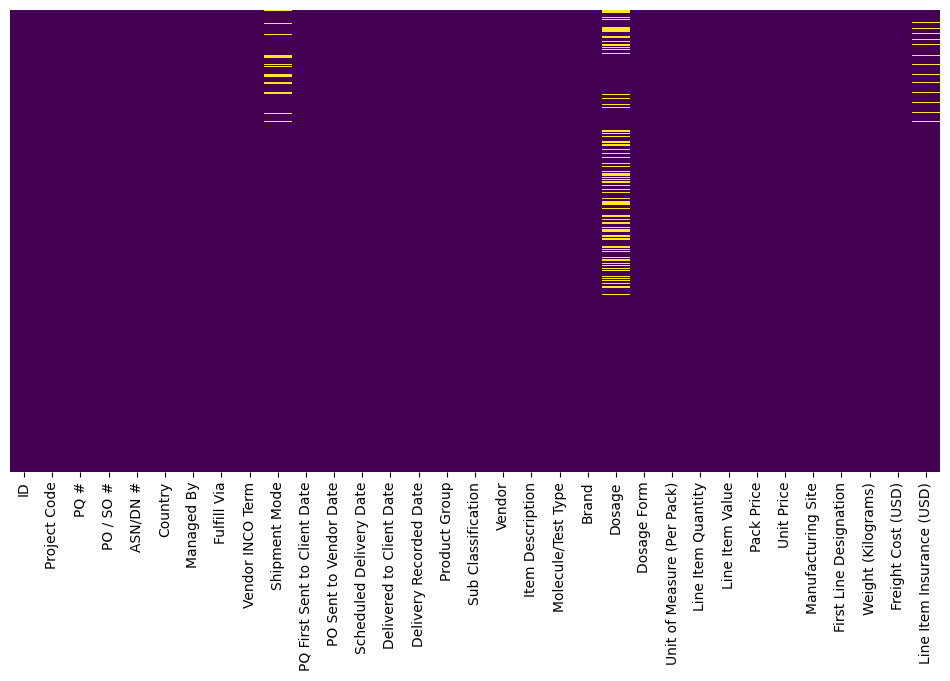

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [ ]:
## Data types

data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [ ]:
data.Country.value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [ ]:
country_names = data.Country.value_counts().index

In [ ]:
country_values = data.Country.value_counts().values

In [ ]:
len(country_names)

43

([<matplotlib.patches.Wedge at 0x7aca58ea4460>,
 [Text(0.984565805659108, 0.49054069589263627, 'South Africa'),
  Text(0.27619205605592795, 1.0647619208872936, 'Nigeria'),
  Text(-0.5223197509970665, 0.9680816482706212, "Côte d'Ivoire"),
  Text(-0.9837581341114553, 0.4921584435621808, 'Uganda'),
  Text(-1.0998135883140374, -0.020250208882896886, 'Vietnam'),
  Text(-0.9811557496134045, -0.4973262460403218, 'Zambia'),
  Text(-0.6759794064904789, -0.8677855967926524, 'Haiti'),
  Text(-0.2604103328818691, -1.0687312377433131, 'Mozambique'),
  Text(0.15927925502256962, -1.0884071475874528, 'Zimbabwe'),
  Text(0.5204091560960988, -0.9691100609586851, 'Tanzania'),
  Text(0.7927572200693814, -0.7625850706825217, 'Rwanda'),
  Text(0.9572349150864842, -0.5419421715823299, 'Congo, DRC'),
  Text(1.0414389493040714, -0.3541255637093033, 'Guyana'),
  Text(1.0824551326507048, -0.19568057082435486, 'Ethiopia'),
  Text(1.0984015734538932, -0.05927886161197627, 'South Sudan')],
 [Text(0.537035893995877,

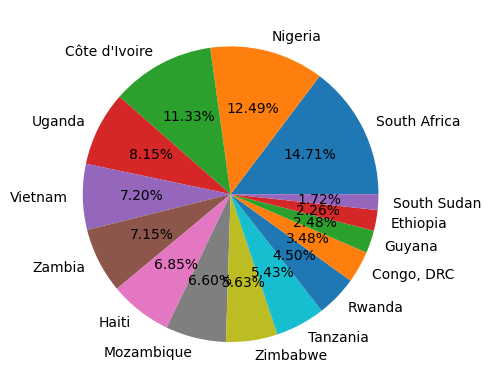

In [ ]:
# drawing Pie chart
plt.pie(country_values[:15],labels=country_names[:15],autopct="%1.2f%%")

Observations:
1. Sounth Africa is the having maximum shipments, followed by Nigeria and citedIvoire.


In [ ]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
pd.options.display.max_rows =1000

In [ ]:
#df_group = data.groupby(["Pack Price",'Product Group','Sub Classification','Vendor']).size().reset_index().rename(columns={0:"Group"})

## Dropping ID as that wont add value to the analysis

In [ ]:
#data.drop(columns=['ID'],inplace=True)

In [ ]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

## working on Numerical

In [ ]:
num_features = []
cat_features = []

for i in data.columns:
  if data[i].dtypes == "object":
    cat_features.append(i)
  else:
    num_features.append(i)



In [ ]:
num_features

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

In [ ]:
data.groupby('Pack Price','Line Item Quantity','Line Item Value','Line Item Insurance (USD)').size()

ValueError: No axis named Line Item Quantity for object type DataFrame

In [ ]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

Removing below features as those are date datatype

'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',


In [ ]:
removed= ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']

In [ ]:
for i in removed:
  cat_features.remove(i)

In [ ]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

In [ ]:
num_features

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

In [ ]:
data["Weight_new"]=0
for i in range(data.shape[0]):
  if data['Weight (Kilograms)'].loc[i]  in ["Weight Captured Separately"]:
    data['Weight_new'].loc[i]=data['Weight (Kilograms)'].loc[i]
  elif data['Weight (Kilograms)'].loc[i].split(" ")[0] == "See":
    data['Weight_new'].loc[i]="See ASN/DN "
  else:
    data['Weight_new'].loc[i]="Normal Measurement"


<ipython-input-135-a2629753b9b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weight_new'].loc[i]="Normal Measurement"


In [ ]:
#for freight cost
data['Freight_cost_new']=0
for i in range(data.shape[0]):

    if data['Freight Cost (USD)'].loc[i]  in ["Freight Included in Commodity Cost",'Invoiced Separately']:
        data['Freight_cost_new'].loc[i]=data['Freight Cost (USD)'].loc[i]

    elif data['Freight Cost (USD)'].loc[i].split(" ")[0]=="See":
        data['Freight_cost_new'].loc[i]="See ASN/DN Tag"

    else :
        data['Freight_cost_new'].loc[i]="Normal Measurement"

<ipython-input-136-df87e72ffcde>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Freight_cost_new'].loc[i]="Normal Measurement"


In [ ]:
data['Weight_new'].value_counts()

Normal Measurement            6372
See ASN/DN                    2445
Weight Captured Separately    1507
Name: Weight_new, dtype: int64

In [ ]:
data['Freight_cost_new'].value_counts()

Normal Measurement                    6198
See ASN/DN Tag                        2445
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
Name: Freight_cost_new, dtype: int64

We need to convert the data type of below variables to numeric

'Weight (Kilograms)',
 'Freight Cost (USD)'

In [ ]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'],errors="coerce")
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'],errors="coerce")


In [ ]:
num_features

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

In [ ]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

In [ ]:
## Dropping weight and freight cost
cat_features.remove("Weight (Kilograms)")
cat_features.remove("Freight Cost (USD)")


In [ ]:
num_features.append('Weight (Kilograms)')
num_features.append('Freight Cost (USD)')
for i in num_features:
  print(i,data[i].isnull().sum())

ID 0
Unit of Measure (Per Pack) 0
Line Item Quantity 0
Line Item Value 0
Pack Price 0
Unit Price 0
Line Item Insurance (USD) 287
Weight (Kilograms) 3952
Freight Cost (USD) 4126


In [ ]:
for i in num_features:
  print(i,data[i].value_counts(ascending=False))

ID 1        1
82565    1
82594    1
82595    1
82596    1
        ..
26571    1
26576    1
26590    1
26591    1
86823    1
Name: ID, Length: 10324, dtype: int64
Unit of Measure (Per Pack) 60      4121
30      2630
100      976
240      670
120      474
20       470
90       222
300      157
1        126
25       114
200       76
180       76
270       53
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: Unit of Measure (Per Pack), dtype: int64
Line Item Quantity 10000    93
1000     91
100      87
2000     73
5000     69
         ..
814       1
37680     1
3939      1
2607      1
36639     1
Name: Line Item Quantity, Length: 5065, dtype: int64
Line Item Value 200000.00    29
16000.00     23
800.00       18
0.00         17
14400.00     16
             ..
415552.08     1
561.46        1
438340.92    

Observations:
1. ID column can be dropped as that wont add value to price prediction.It is just a identity number.

In [ ]:
data['Line Item Insurance (USD)'].unique()

array([    nan,  192.  ,  128.  , ..., 5284.04,  134.03,   85.82])

In [ ]:
data['Line Item Insurance (USD)'].mean()

240.11762578459698

In [ ]:
data['Line Item Insurance (USD)'].mode()

0    0.0
Name: Line Item Insurance (USD), dtype: float64

<Axes: xlabel='Line Item Insurance (USD)', ylabel='Count'>

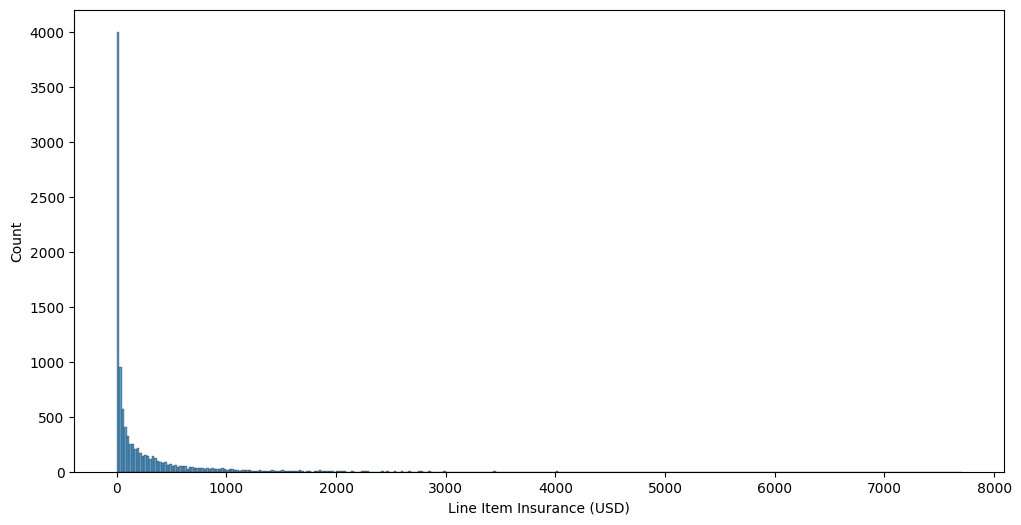

In [ ]:
sns.histplot(x='Line Item Insurance (USD)',data=data)

In [ ]:
## Imputing missing values with mode values
data['Line Item Insurance (USD)'].fillna(data['Line Item Insurance (USD)'].mode()[0],inplace=True)

### Categorical Variables

In [ ]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation']

In [ ]:
for i in cat_features:
  print(i)
  print(data[i].value_counts())
  print("______________________________________________")


Project Code
116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
106-HT-T30    450
111-MZ-T30    431
110-ZM-T30    406
109-TZ-T30    369
107-RW-T30    340
116-ZA-T01    319
161-ZA-T30    315
104-CI-T01    314
101-CD-T30    308
113-ZW-T30    263
110-ZM-T01    260
111-MZ-T01    200
106-HT-T01    171
108-VN-T01    166
105-GY-T30    159
133-NG-T30    145
112-NG-T01    139
109-TZ-T01    135
114-UG-T01    134
117-ET-T01    118
103-ZW-T30    101
102-BI-T30     98
117-ET-T30     98
105-SS-T30     91
107-RW-T01     90
151-NG-T01     65
113-ZW-T01     65
123-NG-T01     52
102-KE-T30     47
102-SD-T30     46
119-NA-T01     45
100-ZW-T01     44
102-NG-T01     42
102-GY-T01     41
100-CI-T01     40
103-SS-T30     37
901-CM-T30     36
102-KE-T01     32
105-GH-T30     32
900-SS-T30     30
102-BW-T01     30
200-ZW-T30     28
154-NG-T30     27
102-ZW-T30     26
102-CD-T30     24
900-UG-T30     23
102-UG-T30     21
103-CM-T30     20
102-GY-T30     19
144-BW-T30     

'Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #' - all these features are used just for identity purpose . Considering these to be unworthy for price prediction, We are dropping these features

In [ ]:
data.drop(columns=['Project Code','PQ #','PO / SO #','ASN/DN #'],inplace=True)

In [ ]:
data.columns

Index(['ID', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group',
       'Sub Classification', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Weight_new', 'Freight_cost_new'],
      dtype='object')

In [ ]:
data.drop(columns=['ID'],inplace=True)

In [168]:
data.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group',
       'Sub Classification', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Weight_new', 'Freight_cost_new'],
      dtype='object')

In [169]:
cat_features.remove('Project Code')
cat_features.remove('PQ #')
cat_features.remove('PO / SO #')
cat_features.remove('ASN/DN #')

In [170]:
for i in cat_features:
  print(i)
  print(data[i].value_counts())
  print("______________________________________________")

Country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                

Observation:
1. Below are the top 5 desination countries:
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688


2. Most of the shipments are managed by PMO-US-Nearly 99.42% of shipments.

3. Fulfill Via from RDC is nearly 52.3 % while thru Direct Drop from seller is 47.65%

4. 52.3% of international shipment's INCOTERM responsibility is RDC.

5. Nearly 60% of shipments are done thru AIR

6. Nearly 68% of shipemnts are having first line designation as Yes


In [178]:
data[["Item Description","Molecule/Test Type","Dosage","Dosage Form","Manufacturing Site"]]

,Item Description,Molecule/Test Type,Dosage,Dosage Form,Manufacturing Site
0,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",NaN,Test kit,Ranbaxy Fine Chemicals LTD
1,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,10mg/ml,Oral suspension,"Aurobindo Unit III, India"
2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",NaN,Test kit,ABBVIE GmbH & Co.KG Wiesbaden
3,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,150mg,Tablet,"Ranbaxy, Paonta Shahib, India"
4,"Stavudine 30mg, capsules, 60 Caps",Stavudine,30mg,Capsule,"Aurobindo Unit III, India"
...,...,...,...,...,...
10319,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,30/50/60mg,Chewable/dispersible tablet - FDC,"Mylan, H-12 & H-13, India"
10320,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,150/300mg,Tablet - FDC,Hetero Unit III Hyderabad IN
10321,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,600/300/300mg,Tablet - FDC,Cipla Ltd A-42 MIDC Mahar. IN
10322,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,150/300mg,Tablet - FDC,Mylan (formerly Matrix) Nashik


"Item Description","Molecule/Test Type","Dosage","Dosage Form", - All these features gives information of the medicine and Molecule/Test TYpe ,dosage and dosage form features info is already available in the Item description.
Item description also wont add value to the price . It can be used only for analysis purpose.

In [179]:
data.drop(columns=['Item Description'],inplace=True)

In [180]:
data.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group',
       'Sub Classification', 'Vendor', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Weight_new', 'Freight_cost_new'],
      dtype='object')

##dealing with date features

In [182]:
data[['PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date',]]

,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date
0,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06
1,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06
2,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06
3,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06
4,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06
...,...,...,...,...,...
10319,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15
10320,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15
10321,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15
10322,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15


In [183]:
dates= ['PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date',]

In [186]:
for i in dates:
  print(data[i].value_counts(ascending=False))

Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
11/6/09                98
11/21/11               90
3/10/11                89
3/18/10                78
8/31/10                75
2/10/10                72
3/18/13                64
10/13/10               62
12/13/12               56
10/21/13               53
5/7/09                 52
8/9/13                 51
12/8/09                49
10/4/11                48
8/29/11                46
3/1/12                 46
1/16/13                46
4/19/10                44
4/19/13                43
6/23/10                43
9/11/12                43
12/29/14               42
10/23/09               40
10/8/13                39
11/26/10               39
5/15/12                39
12/8/11                38
5/6/13                 37
10/22/14               36
10/15/09               36
8/22/11                36
12/14/12               36
10/5/12                35
11/15/12    

Observations:

1. Date columns have many anamolies.

2. Delivered to client date and delivery recorded date both seems to be having the same meaning. It better to drop one in that case.

3. 25% of the data is unknown in the date field of PO first sent to client

4. More than 50% of the shipments is having unknown info in  PO Sent to Vendor Date feature.



In [197]:
#dropping PO first sent to client and PO sent to vendor date

data.drop(columns=['PQ First Sent to Client Date','PO Sent to Vendor Date',],inplace=True)

In [198]:
data.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Weight_new', 'Freight_cost_new'],
      dtype='object')

In [200]:
#dropping delivery recorded date
data.drop(columns=['Delivery Recorded Date'],inplace=True)


In [201]:
data.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'Scheduled Delivery Date', 'Delivered to Client Date',
       'Product Group', 'Sub Classification', 'Vendor', 'Molecule/Test Type',
       'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)', 'Weight_new',
       'Freight_cost_new'],
      dtype='object')

In [212]:
data.drop(columns=['delay'],inplace=True)

In [206]:
data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'])
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'])

In [213]:
# Computing if there are any delivery delays

data["On_Time_delivery"]=(data['Scheduled Delivery Date'] == data['Delivered to Client Date'])



In [214]:
data.head()

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Product Group,Sub Classification,Vendor,...,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Weight_new,Freight_cost_new,On_Time_delivery
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,...,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,0.0,Normal Measurement,Normal Measurement,True
1,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,...,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,0.0,Normal Measurement,Normal Measurement,True
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,...,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,0.0,Normal Measurement,Normal Measurement,True
3,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,...,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,0.0,Normal Measurement,Normal Measurement,True
4,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,...,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,0.0,Normal Measurement,Normal Measurement,True


In [215]:
data['On_Time_delivery'].value_counts()

True     6324
False    4000
Name: On_Time_delivery, dtype: int64

Observations:
There more than 40 % of the shipments are not deliveried on time. Investigation can be made to reduce this percentage.

In [217]:
data.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'Scheduled Delivery Date', 'Delivered to Client Date',
       'Product Group', 'Sub Classification', 'Vendor', 'Molecule/Test Type',
       'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)', 'Weight_new',
       'Freight_cost_new', 'On_Time_delivery'],
      dtype='object')

In [218]:
data['Manufacturing Site'].value_counts(ascending=False)

Aurobindo Unit III, India                                                   3172
Mylan (formerly Matrix) Nashik                                              1415
Hetero Unit III Hyderabad IN                                                 869
Cipla, Goa, India                                                            665
Strides, Bangalore, India.                                                   540
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    219
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, SA                                                141
Chembio Diagnostics Sys. Inc

<Axes: xlabel='Manufacturing Site'>

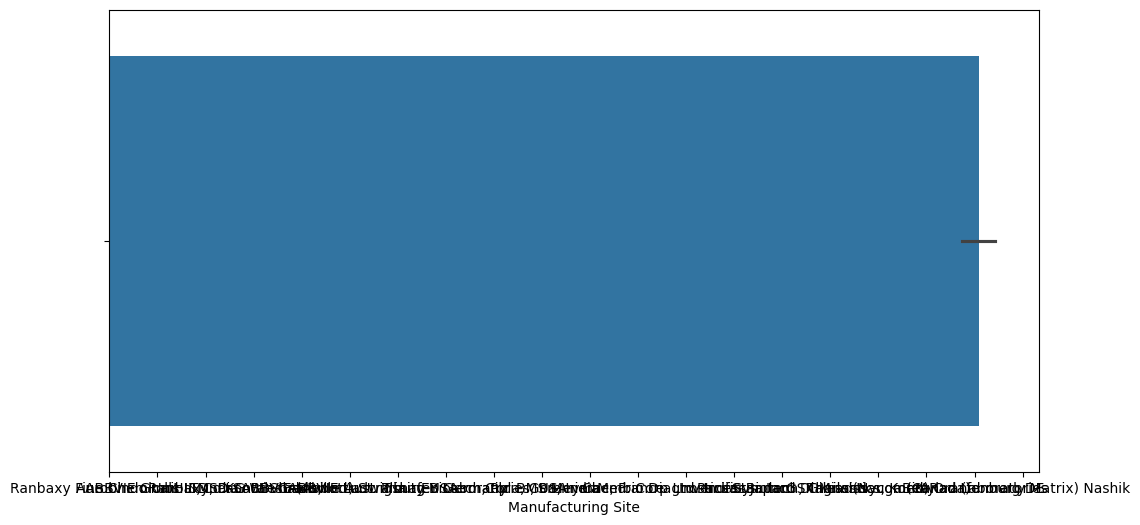

In [219]:
sns.barplot(x="Manufacturing Site",data=data)

In [ ]:
df[(df["Pack Price"]==0) & (df['Line Item Value']==0)]

,Pack Price,ID,Line Item Quantity,Line Item Value,Line Item Insurance (USD),0
Group,0.0,10910,3119,0.0,0.0,1
1,0.0,12522,180,0.0,0.0,1
2,0.0,14079,2915,0.0,0.0,1
3,0.0,17135,3053,0.0,0.0,1
4,0.0,19405,3039,0.0,0.0,1
5,0.0,24653,3029,0.0,0.0,1
7,0.0,56899,2330,0.0,0.0,1
8,0.0,61493,112,0.0,0.0,1
9,0.0,65555,3015,0.0,0.0,1
10,0.0,67769,112,0.0,0.0,1


In [ ]:
df[(df["Pack Price"]==0) & (df['Line Item Value']!=0)]

,Pack Price,ID,Line Item Quantity,Line Item Value,Line Item Insurance (USD),0
6,0.0,47301,814,0.01,0.0,1


Observations:
If there is line item insurance then packing price will be mandatory.


In [ ]:
import matplotlib

In [ ]:
matplotlib.rcParams['figure.figsize']=(12,6)

<Axes: xlabel='Pack Price', ylabel='Line Item Value'>

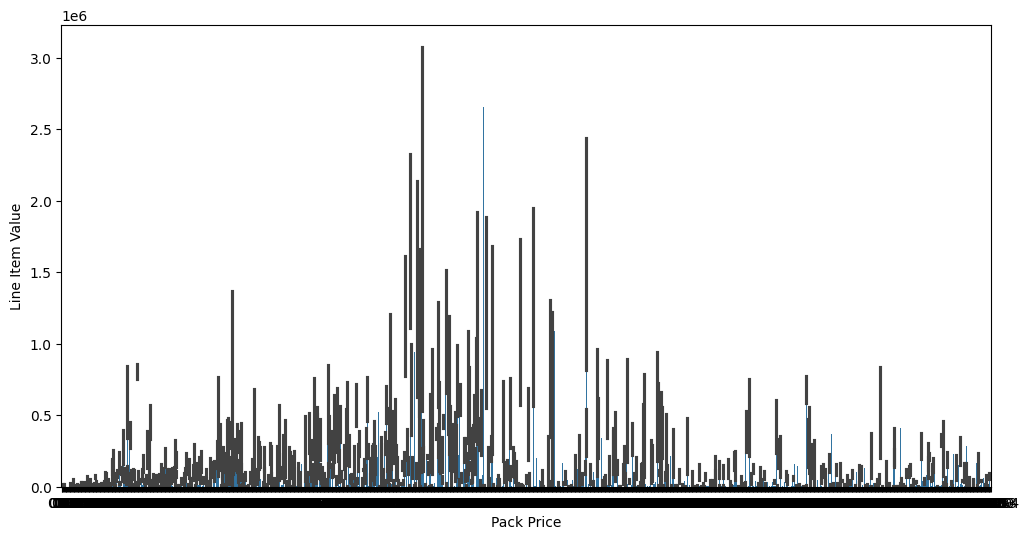

In [ ]:
sns.barplot(x="Pack Price",y="Line Item Value",data=df)

<Axes: xlabel='Line Item Insurance (USD)', ylabel='Pack Price'>

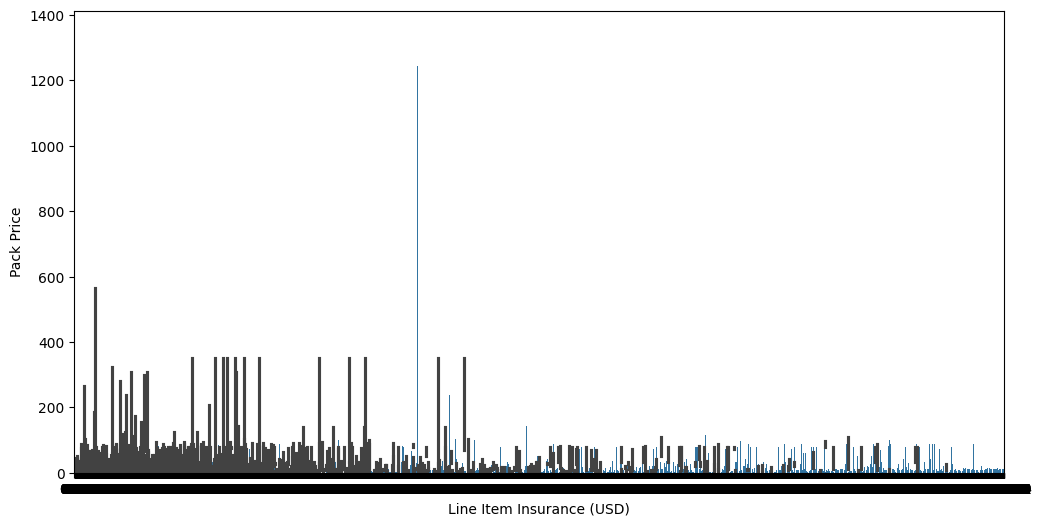

In [ ]:
sns.barplot(y="Pack Price",x="Line Item Insurance (USD)",data=df)

Observations:
Maximum Pack price is above 1200USD


<Axes: xlabel='Line Item Quantity', ylabel='Pack Price'>

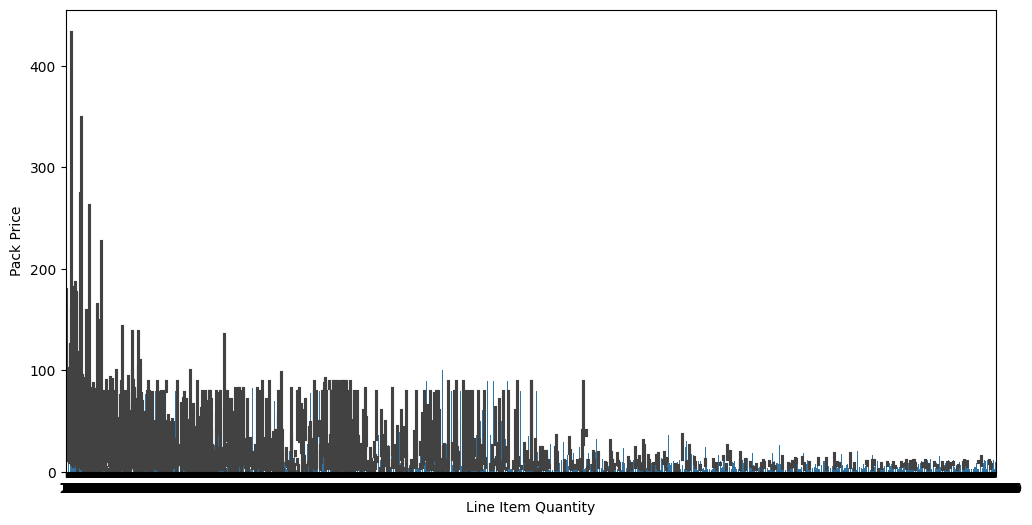

In [ ]:
sns.barplot(y="Pack Price",x="Line Item Quantity",data=df)

Observations:
As quantity inncreases price also increase

In [ ]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

We need to convert the data type of below variables to numeric

'Weight (Kilograms)',
 'Freight Cost (USD)'

In [ ]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'])


ValueError: Unable to parse string "See ASN-93 (ID#:1281)" at position 8

In [ ]:
#Treating of anamolis
data[data['Freight Cost (USD)'].str.contains("See")]
#data.query(Freight Cost (USD).str.contains("avs"))

#data[data['A'].str.contains("hello")]



In [ ]:
1.find asn
get the weight and f.c
update to particular


## Working on duplicates

In [ ]:
data.duplicated().sum()

In [ ]:
data[data.duplicated()]

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()